In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

np.random.seed(0)

# The aim of this first notebook is to replicate some of Professor Hanson's simulations.

In his [blog post](https://www.overcomingbias.com/2020/12/how-far-aggressive-aliens-part-2.html), Professor Hanson performs a simple simulation in 1d space of GC origin and expansion. 

**Let's first sample 4000 candidate GCs in spacetime (x, t), with x drawn uniformly in [0, 1], and t drawn from a power law distribution with density proportional to $t^n$. Let $n = 10$**

In [2]:
num_candidates = 4000
n = 10
GCs = [
    (scipy.stats.uniform.rvs(), scipy.stats.powerlaw.rvs(n)) 
        for _ in range(num_candidates)
]
GCs.sort(key=lambda GC: GC[1]) # sort by origin time, from earliest to latest

**Let's plot all these GC origins, first ignoring the fact that many of these will be prevented from expanding (and becoming GCs) by other GCs.**

Text(0.5, 0, 'x')

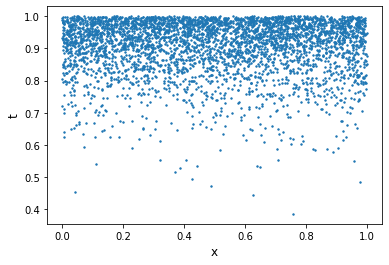

In [3]:
plt.scatter(*zip(*GCs), s=2)
plt.ylabel("t", fontsize=12)
plt.xlabel("x", fontsize=12)

**Let's now remove GCs which could be colonized by other GCs before they arise**

In [4]:
speed = 1 / 8 # 1/8th the speed of light

def can_originate(GC, GCs, speed):
    for competing_GC in GCs: # iterate through competitors
        # discard GC if there is an older competitor which will snuff it out
        if competing_GC[1] < GC[1] and abs(competing_GC[0] - GC[0]) <= speed * abs(competing_GC[1] - GC[1]):
            return False
    return True

lucky_GCs = list(filter(lambda GC: can_originate(GC, GCs, speed), GCs))
lucky_GCs.sort(key=lambda GC: GC[0]) # sort by position

print(f"{len(lucky_GCs)} GCs arose in our simulation")

58 GCs arose in our simulation


**This gives us our "true" GC origin points**:

Text(0.5, 0, 'x')

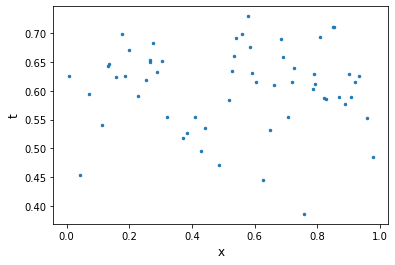

In [5]:
plt.scatter(*zip(*lucky_GCs), s=6)
plt.ylabel("t", fontsize=12)
plt.xlabel("x", fontsize=12)

**We now trace out the expansion of each GC and observe where they meet.**

In [6]:
meeting_points = []
GCs_and_meeting_points = []
for i in range(len(lucky_GCs) - 1):
    x0, t0 = lucky_GCs[i]
    x1, t1 = lucky_GCs[i+1]
    x = ((speed*(t1 - t0)) + (x0 + x1)) / 2
    t = t0 + (x - x0)*(1/speed)
    GCs_and_meeting_points.append((x0, t0))
    GCs_and_meeting_points.append((x, t))
    meeting_points.append((x, t))
GCs_and_meeting_points.append(lucky_GCs[-1])

Text(0.5, 0, 'x')

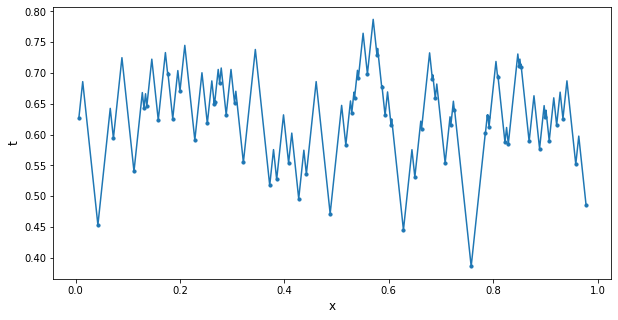

In [7]:
plt.figure(figsize=(10, 5))

plt.scatter(*zip(*lucky_GCs), s=10)
plt.plot(*zip(*GCs_and_meeting_points))
plt.ylabel("t", fontsize=12)
plt.xlabel("x", fontsize=12)

## Okay great! This looks quite similar to the figure in Professor Hanson's blog post! The next steps for the simulation (as stated on the blog) are:

A) set a power n in tn and estimate 1) a density in space-time of origins of oases which might birth GCs, 2) a distribution over oasis durations, and 3) a distribution over GC expansion speeds,

B) randomly sample 1) oasis spacetime origins, 2) durations to produce a candidate GC origin after its oasis origin times, using tn , and 3) expansion speed for each candidate GC,

C) delete candidate GCs if their birth happens after its oasis ends or after a colony from another GC colony could reach there before then at its expansion speed.

D) The GC origins that remain give a distribution over space-time of such GC origins. Projecting the expansion speed forward in time gives the later spheres of control of each GC until they meet.

**Let's get to work on this!**